<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Exercises for Quantum Correlation </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

Run the following cell to open the exercises.

<i><a href="https://www.mathjax.org" target="_blank">MathJax</a> is used to express mathematical expressions and it requires internet connection.</i>
<hr>

In [1]:
import os, webbrowser
webbrowser.open(os.path.abspath("Exercises_Quantum_Correlation.html"))

True

[2524:2524:0113/094735.994465:ERROR:policy_logger.cc(157)] :components/enterprise/browser/controller/chrome_browser_cloud_management_controller.cc(161) Cloud management controller initialization aborted as CBCM is not enabled. Please use the `--enable-chrome-browser-cloud-management` command line flag to enable it if you are not using the official Google Chrome build.
'\\wsl.localhost\Ubuntu\home\edmondium\bronze-qiskit\quantum-with-qiskit'
CMD.EXE was started with the above path as the current directory.
UNC paths are not supported.  Defaulting to Windows directory.
sh: 1: /mnt/c/Users/edmon/AppData/Local/Microsoft/WindowsApps/MSAL.wsl.proxy.exe: not found
[2749:4:0113/094742.638462:ERROR:persistent_asset_storage_impl.cc(113)] Initialize succeeded with already open DB
[2749:4:0113/094742.685084:ERROR:persistent_asset_storage_impl.cc(113)] Initialize succeeded with already open DB
[2749:4:0113/094742.685275:ERROR:persistent_asset_storage_impl.cc(113)] Initialize succeeded with already 

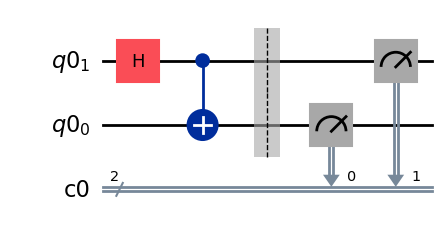

00 is mapped to {'11': 44, '00': 56}


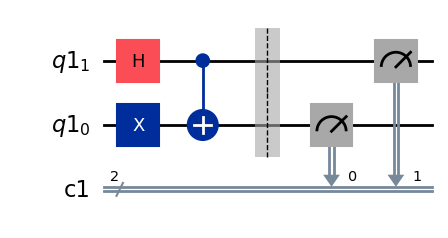

01 is mapped to {'10': 59, '01': 41}


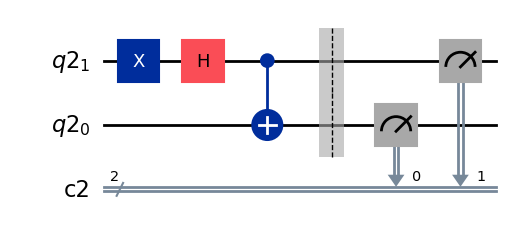

10 is mapped to {'11': 40, '00': 60}


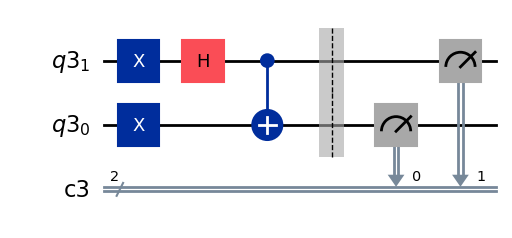

11 is mapped to {'10': 45, '01': 55}


[3402:4:0113/095742.820783:ERROR:persistent_asset_storage_impl.cc(113)] Initialize succeeded with already open DB
[3402:4:0113/095742.821511:ERROR:persistent_asset_storage_impl.cc(113)] Initialize succeeded with already open DB


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
inputs = ['00', '01', '10', '11']
for i in inputs:
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q, c)
    if i[0] == '1':
        qc.x(q[1])
    if i[1] == '1':
        qc.x(q[0])
    qc.h(q[1])
    
    qc.cx(q[1], q[0])
    
    qc.barrier()
    qc.measure(q, c)
    display(qc.draw(output='mpl', style='iqp', reverse_bits=True))
    job = Aer.get_backend("aer_simulator")
    job.set_options(device = "GPU")
    result = job.run(qc, shots = 100).result()
    counts = result.get_counts(qc)
    print(i, 'is mapped to', counts)

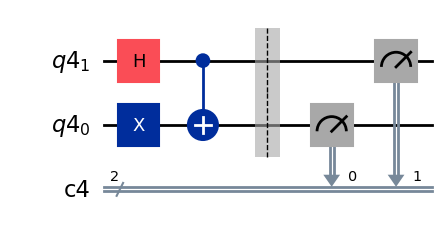

00 is mapped to {'10': 52, '01': 48}


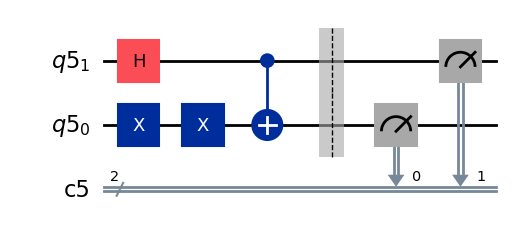

01 is mapped to {'00': 50, '11': 50}


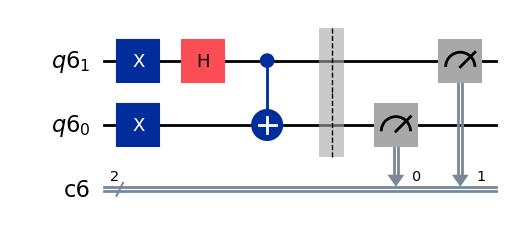

10 is mapped to {'01': 56, '10': 44}


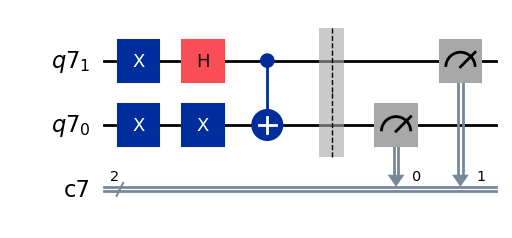

11 is mapped to {'11': 45, '00': 55}


In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
inputs = ['00', '01', '10', '11']
for i in inputs:
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q, c)
    if i[0] == '1':
        qc.x(q[1])
    if i[1] == '1':
        qc.x(q[0])
    qc.x(q[0])
    qc.h(q[1])
    
    qc.cx(q[1], q[0])
    
    qc.barrier()
    qc.measure(q, c)
    display(qc.draw(output='mpl', style='iqp', reverse_bits=True))
    job = Aer.get_backend("aer_simulator")
    job.set_options(device = "GPU")
    result = job.run(qc, shots = 100).result()
    counts = result.get_counts(qc)
    print(i, 'is mapped to', counts)

CNOT(0) = 
1.0  0.0  0.0  0.0  
0.0  0.0  0.0  1.0  
0.0  0.0  1.0  0.0  
0.0  1.0  0.0  0.0  


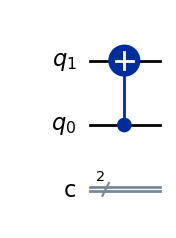

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")

qc = QuantumCircuit(q,c)

qc.cx(q[0],q[1])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3).data

print("CNOT(0) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)

qc.draw(output="mpl", reverse_bits=True, style='iqp')

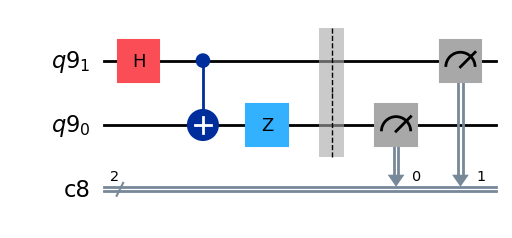

00 is mapped to {'00': 49, '11': 51}


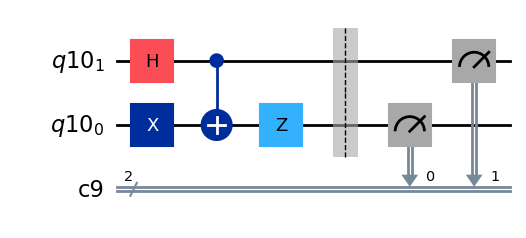

01 is mapped to {'10': 54, '01': 46}


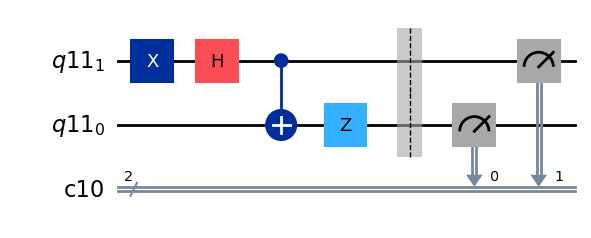

10 is mapped to {'00': 42, '11': 58}


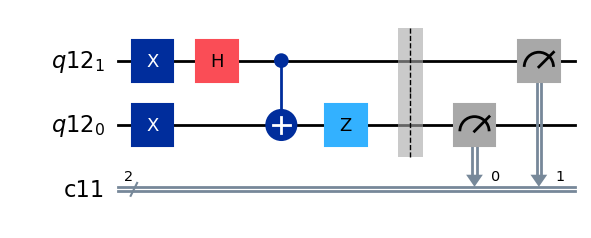

11 is mapped to {'10': 51, '01': 49}


In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
inputs = ['00', '01', '10', '11']
for i in inputs:
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q, c)
    if i[0] == '1':
        qc.x(q[1])
    if i[1] == '1':
        qc.x(q[0])
    qc.h(q[1])
    
    qc.cx(q[1], q[0])
    qc.z(q[0])
    qc.barrier()
    qc.measure(q, c)
    display(qc.draw(output='mpl', style='iqp', reverse_bits=True))
    job = Aer.get_backend("aer_simulator")
    job.set_options(device = "GPU")
    result = job.run(qc, shots = 100).result()
    counts = result.get_counts(qc)
    print(i, 'is mapped to', counts)

/home/edmondium/quantum/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


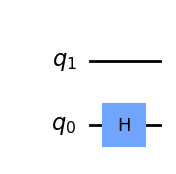

0.707 0.707 0.0 0.0 
0.707 -0.707 0.0 0.0 
0.0 0.0 0.707 0.707 
0.0 0.0 0.707 -0.707 


In [7]:
from qiskit import QuantumCircuit, Aer, execute
qc = QuantumCircuit(2)
qc.h(0)
display(qc.draw(output='mpl',reverse_bits=True))

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3).data
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(round(entry.real,3)) + " "
    print(column)

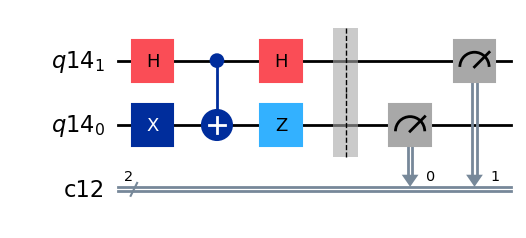

00 is mapped to {'10': 30, '00': 31, '01': 18, '11': 21}


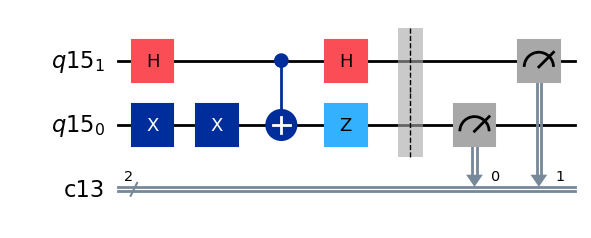

01 is mapped to {'01': 22, '10': 29, '00': 22, '11': 27}


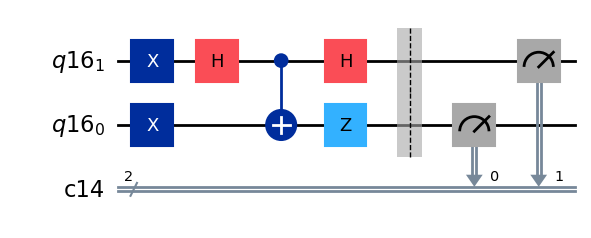

10 is mapped to {'00': 26, '10': 24, '11': 27, '01': 23}


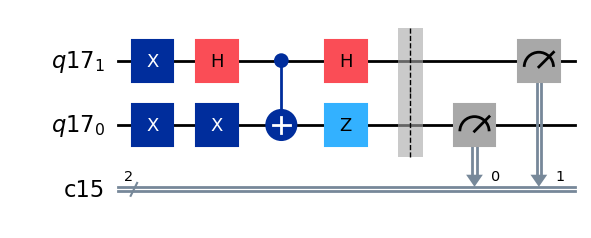

11 is mapped to {'01': 16, '10': 25, '00': 32, '11': 27}


In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
inputs = ['00', '01', '10', '11']
for i in inputs:
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q, c)
    if i[0] == '1':
        qc.x(q[1])
    if i[1] == '1':
        qc.x(q[0])
    qc.h(q[1])
    qc.x(q[0])
    qc.cx(q[1], q[0])
    qc.h(q[1])
    qc.z(q[0])
    qc.barrier()
    qc.measure(q, c)
    display(qc.draw(output='mpl', style='iqp', reverse_bits=True))
    job = Aer.get_backend("aer_simulator")
    job.set_options(device = "GPU")
    result = job.run(qc, shots = 100).result()
    counts = result.get_counts(qc)
    print(i, 'is mapped to', counts)